Глобальная идея проекта - улчшить распознавание местоположения для SLAM используя неразмеченные данные с ЛиДАРов. 
Работа, которая легла в основу идеи - https://github.com/ethz-asl/segmap
Их код неповторяем ( его невозможно собрать), но там есть две ссылки на статьи. Они обязательны к прочтению. 
Исходная идея для моего диплома - была в взять статью 2017 года, повторить ее и улучшить не так как они это сделали в 2018. 
На повторение было потрачено много времении и доказано, что результаты далеки от идеала. 
весь мой код может быть найден здесь https://github.com/Kichkun/perception_project

текущая идея: 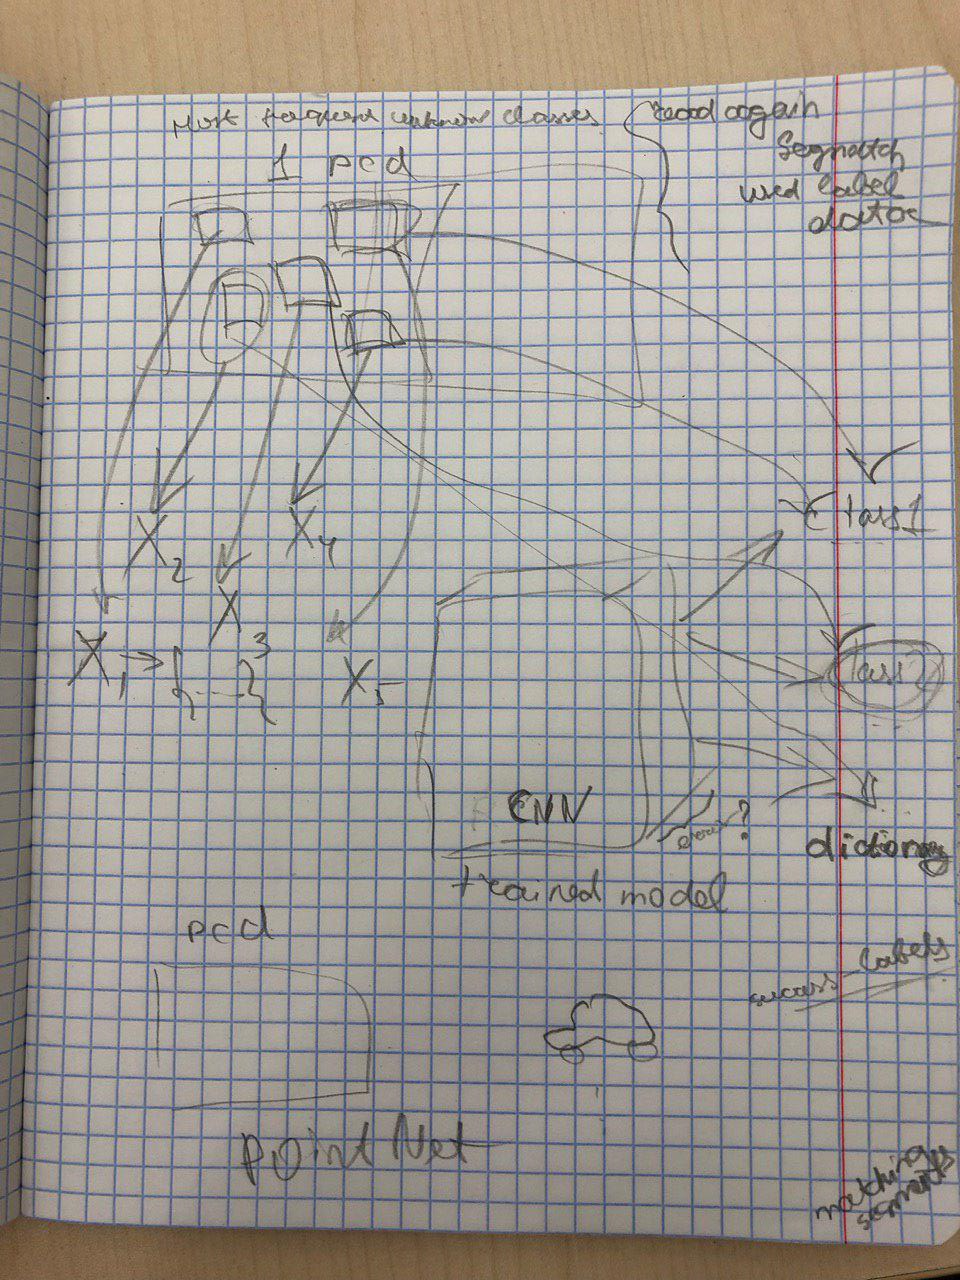


На картинке ниже представлен один PointCLoud после фильтрования земли и выполнения кластеризации с помощью Region Growing (pclpy). Разными цветами обозначены разные кластеры. Прямоугольными рамками разных цветов обозначила будущие разные классы: машины, стены, деревья, дорожные знаки (+люди, велосипеды и пр.) 
#### Предлагаемый для исследования в рамках курса по ML подход следущий: 
1. Необходимо объединить последовательно кластеры с сосдених облаков: для этого необходимо облака точек соседних отсчетов положить на траекторию, выполнить фильтрацию и кластеризацию (шаги могут быть в другом порядке, нужно смотреть по результатам), найти соответствия между сегментами (ICP).   OUTPUT данного шага - global map с уточненными объектами 
2. Необходимо найти мтеод для группировки кластеров в сегменты (KNN, и пр. виды расстояний) и сохранить полученные сегменты (отдельно). OUTPUT данного шага - файл/массив/pcd, с  набором точек как на картинке (машина, стена, дерево, знак  - некоторая группа точек, без разметки)
3. CNN unsupervised classification - разбиваем на n-классов. OUTPUT данного шага - словарь, содержащий примеры объектов для каждого класса
4. Feature extraction: обрабатываем словари, извлекаем схожие признаки (формируем новое пространство фич). OUTPUT данного шага - дескрипторы + границы для каждого класса
5. EVALUATION: RCNN - ищем такие фичи на "сыром" облаке, тестируем segment-based SAM

profit!


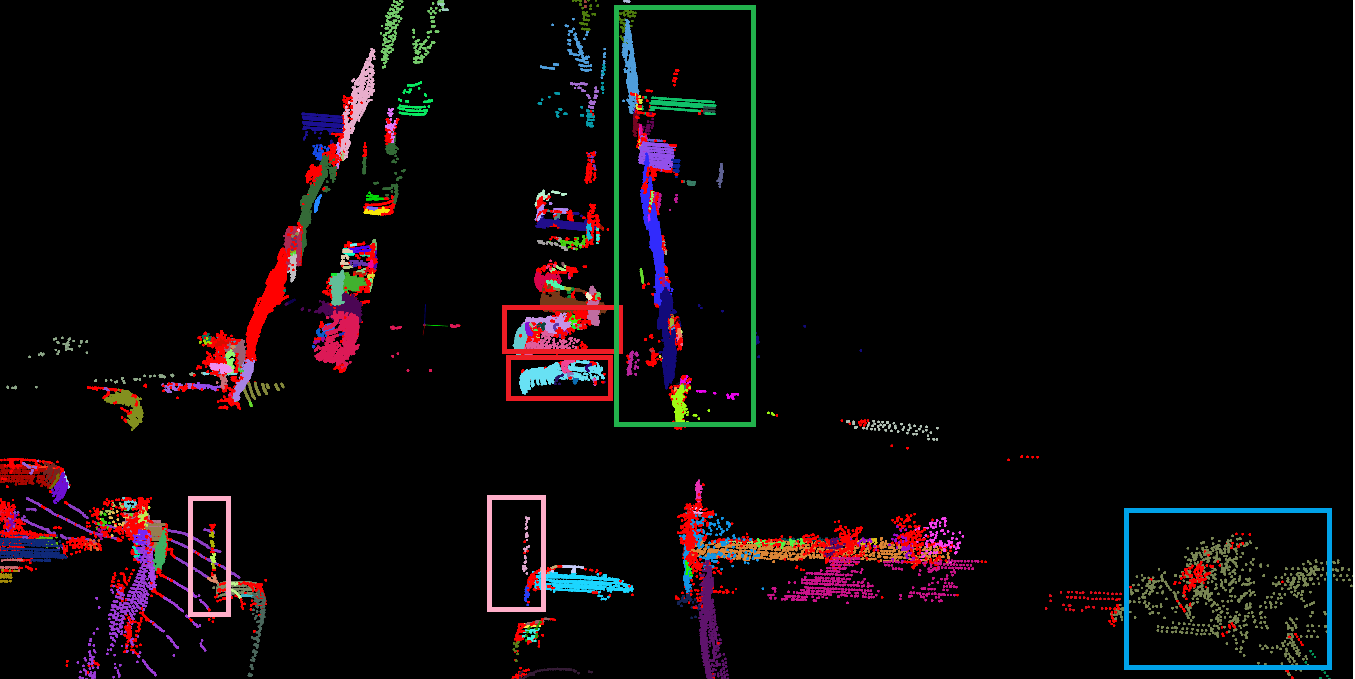

Что может пойти не так: 

#### 1. Необходимо объединить последовательно кластеры с сосдених облаков: для этого необходимо облака точек соседних отсчетов положить на траекторию, выполнить фильтрацию и кластеризацию (шаги могут быть в другом порядке, нужно смотреть по результатам), найти соответствия между сегментами (ICP).   OUTPUT данного шага - global map с уточненными объектами 

-- missalignment - несмотря на все точности расчетов, кластеры могут не идеально накладываться, форма объекта будет смазываться, что повлечет тотальные ошибки далее. Методы решения: rotation to global coordinates, ICP. Возможно, лучше всего на этом шаге будет: отфильтровать землю ДО поворота облака (pclpy, код на github) -> повернуть облака, сложить (open3d, код на github) -> кластеризовать при помощи region growing ( pclpy, код на github) - > вывести на глобальную карту (open3d, код на github) 

#### 2. Необходимо найти мтеод для группировки кластеров в сегменты (KNN, и пр. виды расстояний) и сохранить полученные сегменты (отдельно). OUTPUT данного шага - файл/массив/pcd, с  набором точек как на картинке (машина, стена, дерево, знак  - некоторая группа точек, без разметки)

-- Слишком близкие кластеры будут объединяться в сегменты (человек рядом с машиной итд). Методы решения: geometric features, максимизация расстояний весами на основе плотности 

#### 3. CNN unsupervised classification - разбиваем на n-классов. OUTPUT данного шага - словарь, содержащий примеры объектов для каждого класса

-- Evaluation. Loss function 

#### 4. Feature extraction: обрабатываем словари, извлекаем схожие признаки (формируем новое пространство фич). OUTPUT данного шага - дескрипторы + границы для каждого класса

3d Harris descriptors

#### 5. EVALUATION: RCNN - ищем такие фичи на "сыром" облаке, тестируем segment-based SAM

-- Bad results? Solution: if everything goes bad  - add labels on step 3. It's not legal but everybody do it (WE HARDLY AVOID TO DO THAT AND DO OUR BEST TO NOT TO CHEAT HERE)
profit!


TODO:
1. Step by step what was done with code, function desciptions and results
2. Explain the dataset
3. Discuss segmathc
4. Links!! many links with useful works
5. requirements
